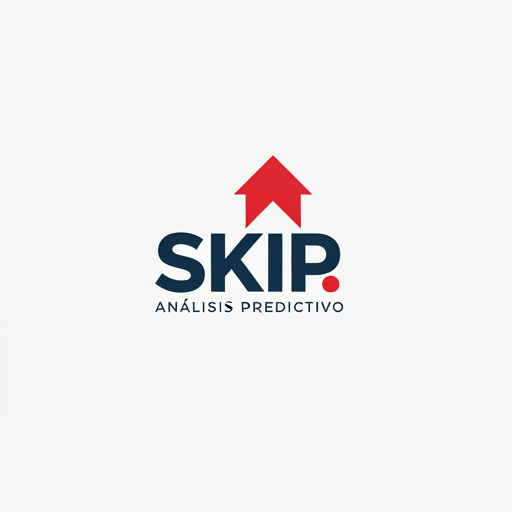

## Objetivo

El Objetivo es mantener un orden de todas las pruebas dentro de el desarrollo de proyecto de analisis predictivo de tendencias Skip

# Correcion de delimitador adecuado CSV

In [51]:
# Subir el archivo desde tu computadora
from google.colab import files
import pandas as pd

# Subir archivo
uploaded = files.upload()

# Nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Cargar el archivo utilizando el delimitador adecuado
data = pd.read_csv(file_name, encoding='latin-1', sep=';')

# Columnas esperadas
expected_columns = [
    'Id', 'Caso de Prueba', 'Descripción', 'Fecha',
    'Área Funcional / Sub proceso', 'Funcionalidad / Característica',
    'Datos / Acciones de Entrada', 'Resultado Esperado',
    'Requerimientos de Ambiente de Pruebas',
    'Procedimientos especiales requeridos',
    'Dependencias con otros casos de Prueba', 'Resultado Obtenido',
    'Estado', 'Última Fecha de Estado', 'Observaciones'
]

# Identificar columnas adicionales no esperadas
extra_columns = [col for col in data.columns if col not in expected_columns]

# Eliminar columnas no deseadas
data = data.drop(columns=extra_columns)

# Identificar columnas faltantes
missing_columns = [col for col in expected_columns if col not in data.columns]

# Agregar columnas faltantes con valores vacíos
for col in missing_columns:
    data[col] = None

# Reordenar las columnas según el orden esperado
data = data[expected_columns]

# Rellenar valores faltantes con un indicador (si es necesario)
data.fillna('No especificado', inplace=True)

# Guardar el archivo limpio y corregido como CSV delimitado por comas
output_file = 'Archivo_Corregido.csv'
data.to_csv(output_file, index=False, sep=',', encoding='utf-8')

# Descargar el archivo procesado
print("\nArchivo procesado correctamente. Descárgalo desde el siguiente enlace:")
files.download(output_file)



Saving Plantilla de Casos de Prueba Skip 1.csv to Plantilla de Casos de Prueba Skip 1 (1).csv

Archivo procesado correctamente. Descárgalo desde el siguiente enlace:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



# Codigo de Caso Pruebas Skip



In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path= "/content/Todas Las Pruebas Skip.csv"
dw=pd.read_csv(path, sep=',')
dw.head(5)

,Id,Caso de Prueba,Descripción,Fecha,Área Funcional / Sub proceso,Funcionalidad / Característica,Datos / Acciones de Entrada,Resultado Esperado,Requerimientos de Ambiente de Pruebas,Procedimientos especiales requeridos,Dependencias con otros casos de Prueba,Resultado Obtenido,Estado,Última Fecha de Estado,Observaciones
0,ASP1,Accesibilidad y Seguridad de la Plataforma,Verificación de inicio de sesión en diferentes...,25-11-2024,Accesibilidad y Seguridad,Inicio de sesión,Credenciales de usuario,Inicio de sesión exitoso en todos los navegadores,"Navegadores instalados (Chrome, Firefox, Safari)",No,Ninguna,La página de inicio de sesión carga correctame...,Aprobado,25-11-2024,"Funciona correctamente en Chrome, Firefox y Sa..."
1,ASP2,Accesibilidad y Seguridad de la Plataforma,"Inicio de sesión en dispositivos móviles (iOS,...",25-11-2024,Accesibilidad y Seguridad,Inicio de sesión,Credenciales de usuario,Inicio de sesión exitoso en dispositivos móviles,Dispositivos iOS y Android configurados,No,Ninguna,La página se adapta bien en dispositivos móvil...,Aprobado,25-11-2024,La interfaz es responsive y no presenta errore...
2,ASP3,Accesibilidad y Seguridad de la Plataforma,Recuperación de contraseña mediante Usuario,25-11-2024,Accesibilidad y Seguridad,Recuperación de contraseña,Dirección de Usuario válida,Correo de recuperación enviado al usuario,Acceso a servicio de Usuario,No,Ninguna,El correo de recuperación se envía correctamen...,Aprobado,25-11-2024,Enlace redirige correctamente a la página de c...
3,ASP4,Accesibilidad y Seguridad de la Plataforma,Acceso restringido para roles específicos.,25-11-2024,Accesibilidad y Seguridad,Control de acceso,Usuario con rol específico,Acceso restringido a funcionalidades limitadas,Configuración de roles y permisos,No,Ninguna,Los usuarios sin el rol adecuado no pueden acc...,Aprobado,25-11-2024,Funcionalidad de restricción de acceso opera s...
4,ASP5,Accesibilidad y Seguridad de la Plataforma,Pruebas de permisos de visualización en usuari...,25-11-2024,Accesibilidad y Seguridad,Control de acceso,Usuario con permisos limitados,Acceso restringido a funcionalidades no autori...,Configuración de permisos,No,Ninguna,Los usuarios con permisos limitados solo ven e...,Aprobado,25-11-2024,Funcionalidad de restricción de acceso opera s...


In [63]:
dw.shape

(1000, 15)

# Caso de pruebas Skip Grafico Dona

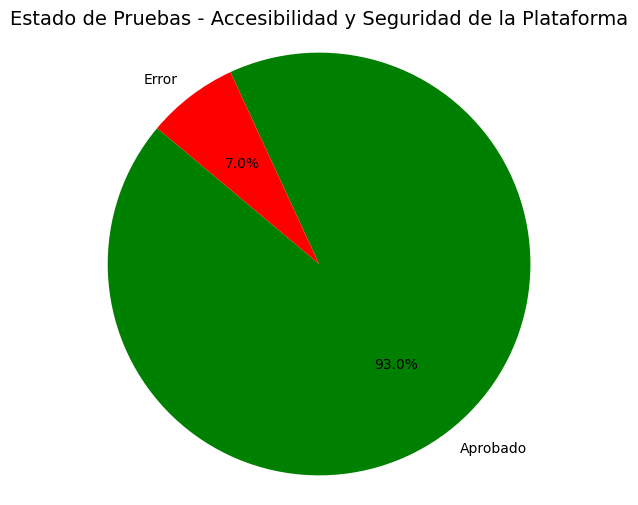

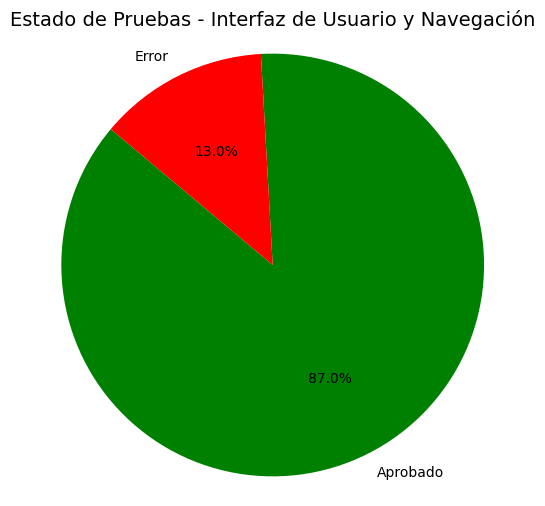

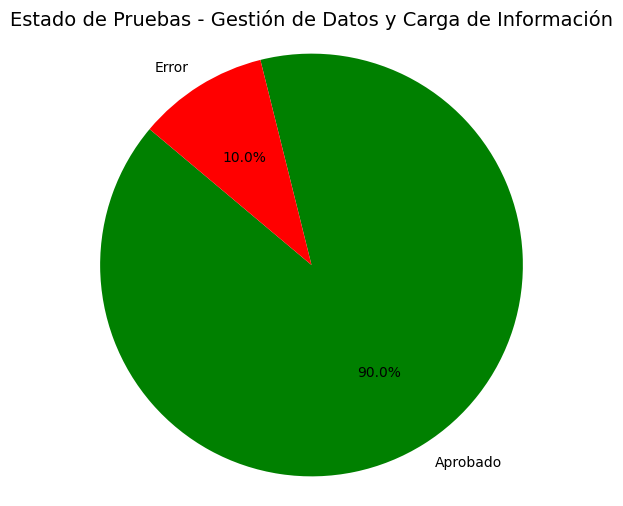

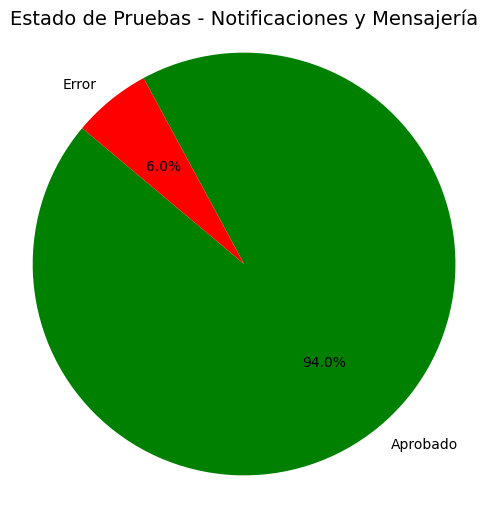

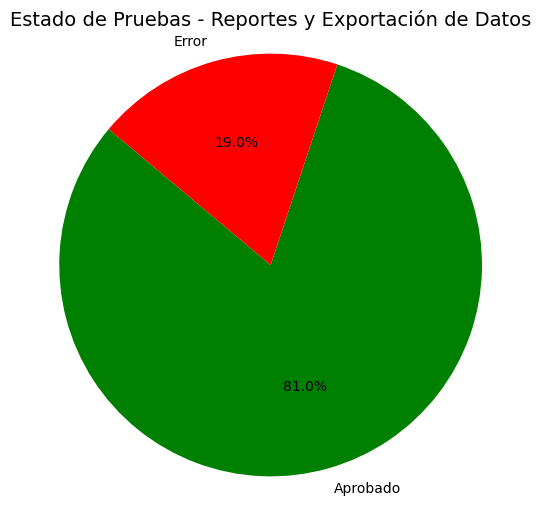

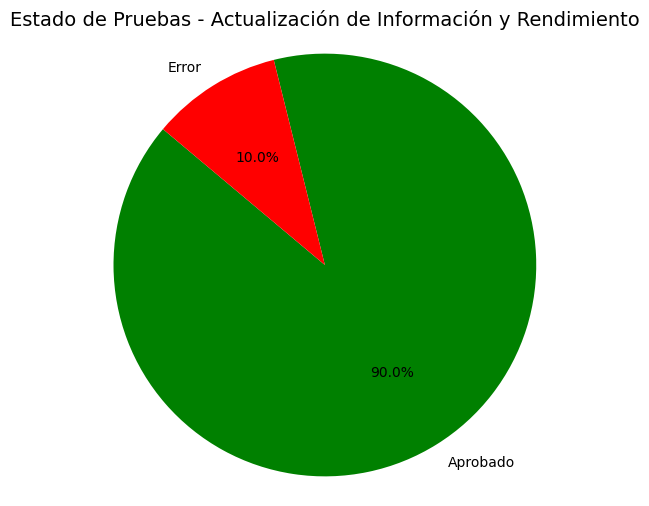

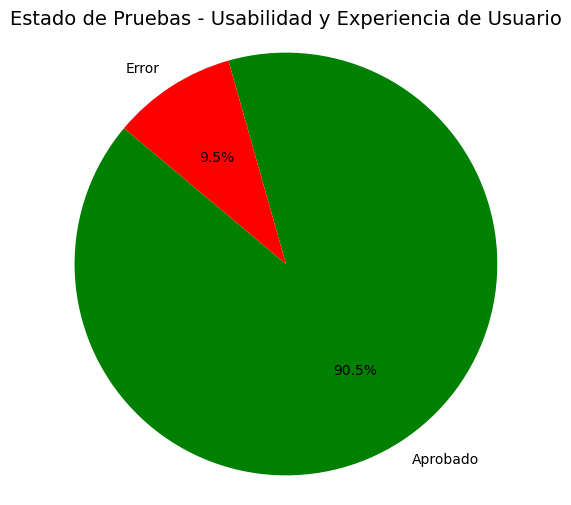

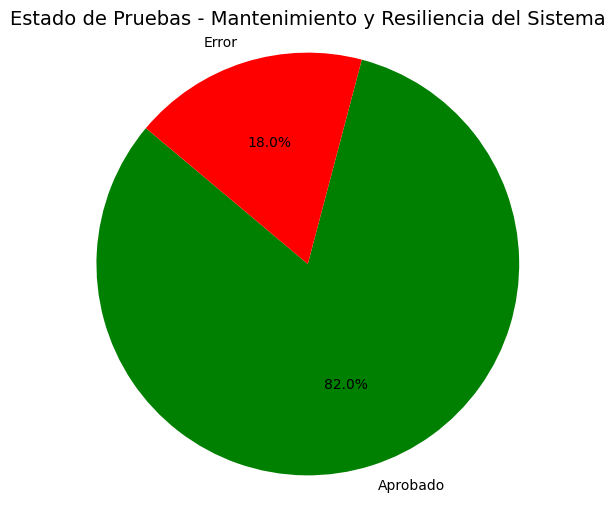

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


# Lista de módulos a analizar
modulos = [
    "Accesibilidad y Seguridad de la Plataforma",
    "Interfaz de Usuario y Navegación",
    "Gestión de Datos y Carga de Información",
    "Notificaciones y Mensajería",
    "Reportes y Exportación de Datos",
    "Actualización de Información y Rendimiento",
    "Usabilidad y Experiencia de Usuario",
    "Mantenimiento y Resiliencia del Sistema"
]

# Filtrar datos relevantes
dw_filtered = dw[dw["Caso de Prueba"].isin(modulos)]

# Agrupar y contar estados por módulo
estado_modulo = dw_filtered.groupby(["Caso de Prueba", "Estado"]).size().unstack(fill_value=0)

# Crear gráficos de pastel para cada módulo
for modulo in modulos:
    if modulo in estado_modulo.index:
        estado = estado_modulo.loc[modulo]
        plt.figure(figsize=(6, 6))
        plt.pie(
            estado,
            labels=estado.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=["green", "red"]
        )
        plt.title(f"Estado de Pruebas - {modulo}", fontsize=14)
        plt.axis('equal')  # Asegurar que el gráfico sea circular
        plt.show()


# Caso de pruebas Skip Grafico Barras

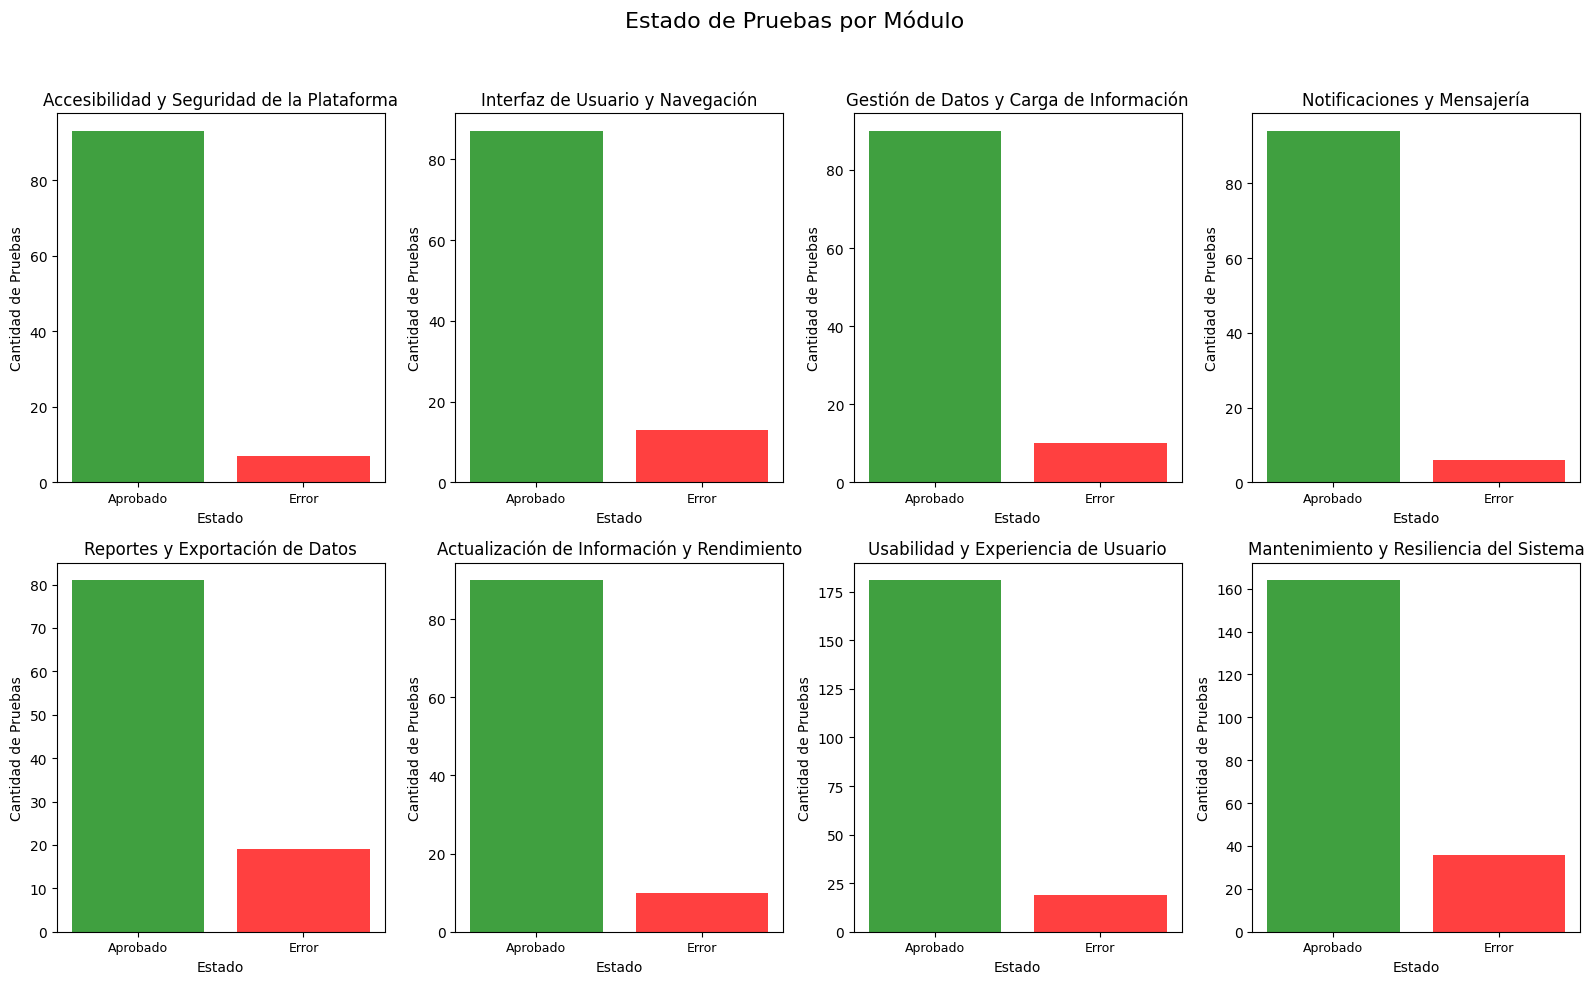

Análisis completo por módulo:
                                            Aprobado  Error  Total  \
Caso de Prueba                                                       
Accesibilidad y Seguridad de la Plataforma        93      7    100   
Actualización de Información y Rendimiento        90     10    100   
Gestión de Datos y Carga de Información           90     10    100   
Interfaz de Usuario y Navegación                  87     13    100   
Mantenimiento y Resiliencia del Sistema          164     36    200   
Notificaciones y Mensajería                       94      6    100   
Reportes y Exportación de Datos                   81     19    100   
Usabilidad y Experiencia de Usuario              181     19    200   

                                            % Aprobado  % Error         min  \
Caso de Prueba                                                                
Accesibilidad y Seguridad de la Plataforma        93.0      7.0  25-11-2024   
Actualización de Información y R

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de módulos a analizar
modulos = [
    "Accesibilidad y Seguridad de la Plataforma",
    "Interfaz de Usuario y Navegación",
    "Gestión de Datos y Carga de Información",
    "Notificaciones y Mensajería",
    "Reportes y Exportación de Datos",
    "Actualización de Información y Rendimiento",
    "Usabilidad y Experiencia de Usuario",
    "Mantenimiento y Resiliencia del Sistema"
]

# Filtrar datos relevantes
dw_filtered = dw[dw["Caso de Prueba"].isin(modulos)]

# Agrupar datos para conteo y cálculo
conteo_estado = dw_filtered.groupby(["Caso de Prueba", "Estado"]).size().unstack(fill_value=0)

# Calcular porcentajes
conteo_estado["Total"] = conteo_estado.sum(axis=1)
conteo_estado["% Aprobado"] = (conteo_estado.get("Aprobado", 0) / conteo_estado["Total"]) * 100
conteo_estado["% Error"] = (conteo_estado.get("Error", 0) / conteo_estado["Total"]) * 100

# Rango de fechas para cada módulo
rango_fechas = dw_filtered.groupby("Caso de Prueba")["Fecha"].agg(["min", "max"])

# Combinar datos para el análisis
analisis_modulos = conteo_estado.join(rango_fechas)

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))  # 2 filas, 4 columnas
fig.suptitle("Estado de Pruebas por Módulo", fontsize=16)

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Iterador para los subplots
ax_idx = 0

for modulo in modulos:
    # Obtener datos para el módulo
    if modulo in conteo_estado.index:
        datos = conteo_estado.loc[modulo, ["Aprobado", "Error"]]

        # Seleccionar el subplot correspondiente
        ax = axes[ax_idx // 4, ax_idx % 4]  # Conversión a filas y columnas

        # Crear gráfico de barras
        ax.bar(datos.index, datos.values, color=["green", "red"], alpha=0.75)
        ax.set_title(modulo, fontsize=12)
        ax.set_xlabel("Estado", fontsize=10)
        ax.set_ylabel("Cantidad de Pruebas", fontsize=10)
        ax.set_xticks(range(len(datos.index)))
        ax.set_xticklabels(datos.index, rotation=0, fontsize=9)

        # Incrementar el índice del subplot
        ax_idx += 1

# Ajustar diseño final
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Mostrar análisis completo
print("Análisis completo por módulo:")
print(analisis_modulos)
